In [79]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.table import Table, join, Column
from astropy.stats import LombScargle
import astropy.units as u                          # We'll need this later.

from astropy.io import ascii
import glob, re

from lightkurve import KeplerLightCurveFile, KeplerLightCurve

% matplotlib inline

import matplotlib as mpl
mpl.style.use('seaborn-colorblind')

#To make sure we have always the same matplotlib settings
#(the ones in comments are the ipython notebook settings)

mpl.rcParams['figure.figsize']=(12.0,9.0)    #(6.0,4.0)
mpl.rcParams['font.size']=20               #10 
mpl.rcParams['savefig.dpi']= 200             #72 
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
from matplotlib import rc

colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']


In [54]:
lcs = KeplerLightCurveFile.from_archive(8197761,quarter='all',cadence='long')
for j, lci in enumerate(lcs):
    lci = lci.get_lightcurve('PDCSAP_FLUX').remove_nans()
    lci = lci[lci.quality==0]
    lcs[j] = lci.normalize()

lc = lcs[0]
for lci in lcs[1:]:
    lc = lc.append(lci)

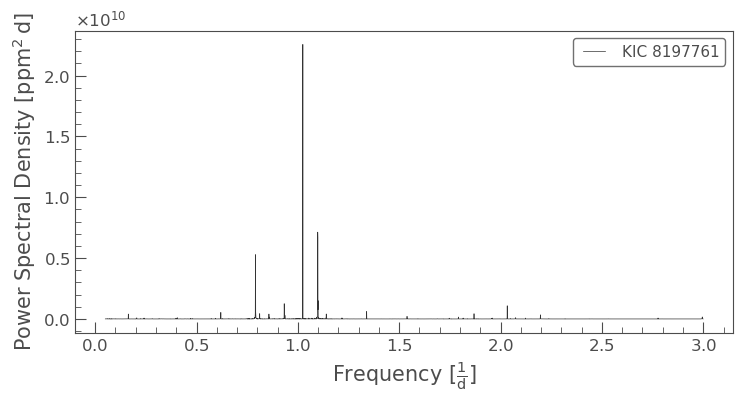

In [55]:
pg = lc.to_periodogram(min_period=8./24.*u.day, max_period=20.*u.day)
pg.plot();


In [56]:
y_fit = LombScargle(lc.time, lc.flux, lc.flux_err).model(lc.time, pg.frequency_at_max_power.value)

(120.53833690600732, 170.53833690600732)

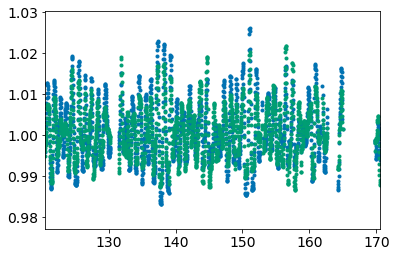

In [59]:
plt.plot(lc.time,lc.flux,'.')
plt.plot(lc.time,lc.flux-y_fit+1,'.')

plt.xlim(lc.time.min(),lc.time.min()+50)

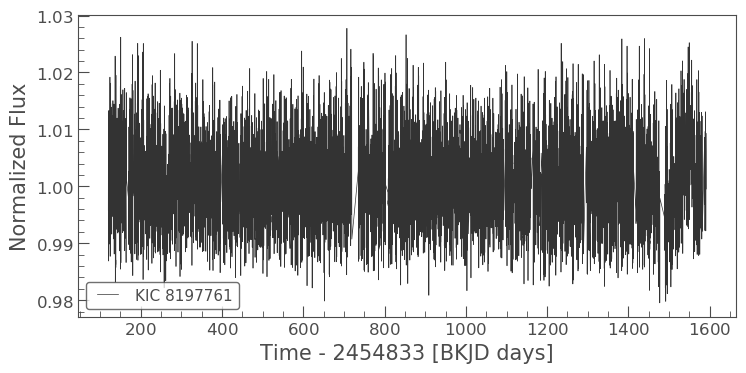

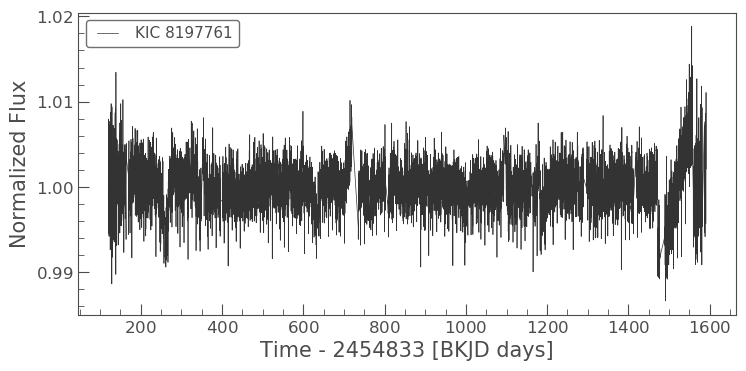

In [69]:
lc = lcs[0]
for lci in lcs[1:]:
    lc = lc.append(lci)
lc.plot()

ff, pp = [], []
for j in range(60):
    pg = lc.to_periodogram(min_period=4./24.*u.day, max_period=30.*u.day)
    ff.append(pg.frequency_at_max_power.value)
    pp.append(pg.max_power.value)
    y_fit = LombScargle(lc.time, lc.flux, lc.flux_err).model(lc.time, pg.frequency_at_max_power.value)
    lc.flux = lc.flux- y_fit + 1.
    
    
lc.plot()

(500, 900)

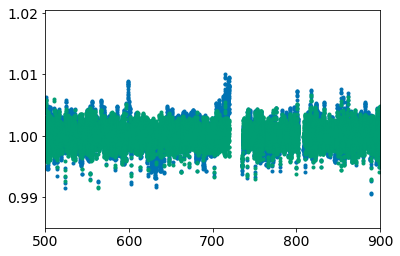

In [70]:
lc2 = lc.flatten()
plt.plot(lc.time,lc.flux,'.')
plt.plot(lc.time,lc2.flux,'.')

plt.xlim(500,900)

In [103]:
planet_period = 9.8686667
folded = lc.fold(planet_period)
binned = folded.bin(binsize=25,method='median')

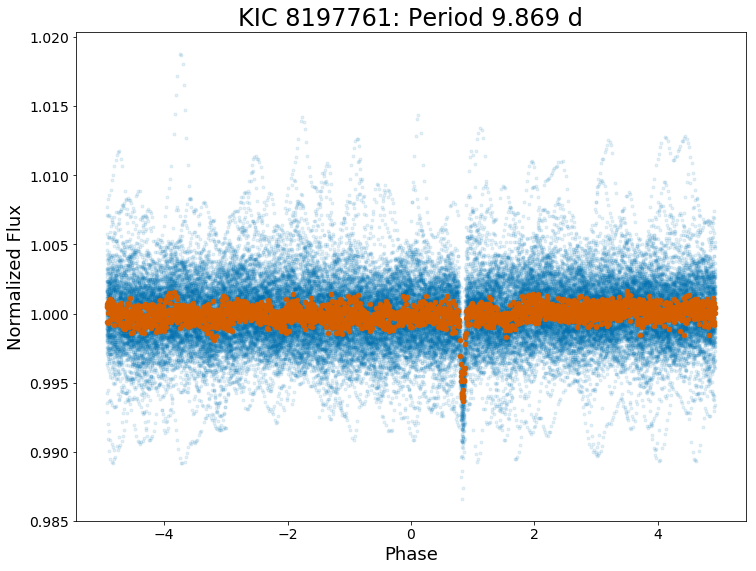

In [114]:
plt.plot(folded.phase*planet_period,folded.flux,'.',alpha=0.1)
plt.plot(binned.phase*planet_period,binned.flux,'.',markersize=9,color=colours[2])
plt.xlabel('Phase')
plt.ylabel('Normalized Flux')
plt.title('KIC %d: Period %.3f d' % (lc.targetid,planet_period))
plt.savefig('oscillator_with_planets.png')

In [115]:
lc.targetid

8197761